In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("/content/drive/MyDrive/Dataset/Sample - Superstore.xls")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
data.duplicated().sum()

0

Recency

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date']) #convert invoicedate to datetime format

#calculate Recency for each customer
current_date=data['Order Date'].max()

recency_data = data.groupby('Customer ID')['Order Date'].max().reset_index()

recency_data['Recency'] = (current_date - recency_data['Order Date']).dt.days

#display the Recency data
print(recency_data[['Customer ID',"Recency"]].head())
print(recency_data)
print(current_date)

  Customer ID  Recency
0    AA-10315      184
1    AA-10375       19
2    AA-10480      259
3    AA-10645       55
4    AB-10015      415
    Customer ID Order Date  Recency
0      AA-10315 2017-06-29      184
1      AA-10375 2017-12-11       19
2      AA-10480 2017-04-15      259
3      AA-10645 2017-11-05       55
4      AB-10015 2016-11-10      415
..          ...        ...      ...
788    XP-21865 2017-11-17       43
789    YC-21895 2017-12-26        4
790    YS-21880 2017-12-21        9
791    ZC-21910 2017-11-06       54
792    ZD-21925 2017-06-11      202

[793 rows x 3 columns]
2017-12-30 00:00:00


In [8]:
#Calculate Frequency for Each Customer
frequency_data = data.groupby("Customer ID")['Order Date'].count().reset_index()
frequency_data.columns=['Customer ID',"Frequency"]

#Display the Frequency data
print(frequency_data.head())

  Customer ID  Frequency
0    AA-10315         11
1    AA-10375         15
2    AA-10480         12
3    AA-10645         18
4    AB-10015          6


In [9]:
data['Total_Price']=data['Quantity'] * data['Sales']
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Total_Price
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.8875
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.7360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,75.7440
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,183.9200
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,517.1520
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,118.4000


In [10]:
#calculate monetary value for each customer
monetary_data=data.groupby('Customer ID')['Total_Price'].sum().reset_index()
monetary_data.columns = ['Customer ID','Monetary']

#Display the monetary data
print(monetary_data.head())

  Customer ID   Monetary
0    AA-10315  16073.344
1    AA-10375   2734.830
2    AA-10480   5493.936
3    AA-10645  22927.855
4    AB-10015   1984.480


In [13]:
# table the maximum 10 values in  recency,frequency and monetary with customer id

rfm_table = recency_data.merge(frequency_data, on='Customer ID', how='left').merge(monetary_data, on='Customer ID', how='left')

rfm_table = rfm_table.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=False)

rfm_table[['Customer ID', 'Recency', 'Frequency', 'Monetary']].head(10)


,Customer ID,Recency,Frequency,Monetary
552,NB-18580,1165,2,951.5360
309,GR-14560,1135,5,7827.6800
637,RE-19405,1097,1,241.8000
163,CM-12715,1035,13,22161.1644
785,VT-21700,1000,9,8102.7320
587,PC-19000,882,3,6455.0720
23,AG-10525,845,9,4166.4180
588,PF-19120,835,19,47934.3680
231,DP-13165,812,4,5297.2480
137,CC-12685,799,12,11196.1550


In [14]:
rfm_table['R_rank'] = rfm_table['Recency'].rank(ascending=False) #give higher ranks to customers with low recency.
rfm_table['F_rank'] = rfm_table['Frequency'].rank(ascending=True)#lower values of "Frequency" will be ranked lower.
rfm_table['M_rank'] = rfm_table['Monetary'].rank(ascending=True)
#rank for 1=1
#2=2
#1=100
#normalizing the rank of the customers
rfm_table['R_rank_norm'] = (rfm_table['R_rank']/rfm_table['R_rank'].max())*100
rfm_table['F_rank_norm'] = (rfm_table['F_rank']/rfm_table['F_rank'].max())*100
rfm_table['M_rank_norm'] = (rfm_table['M_rank']/rfm_table['M_rank'].max())*100

rfm_table.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)

rfm_table.head()

,Customer ID,Order Date,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
552,NB-18580,2014-10-22,1165,2,951.5360,0.126342,1.324086,4.918033
309,GR-14560,2014-11-21,1135,5,7827.6800,0.252685,8.890290,41.488020
637,RE-19405,2014-12-29,1097,1,241.8000,0.379027,0.378310,1.261034
163,CM-12715,2015-03-01,1035,13,22161.1644,0.505370,57.503153,80.580076
785,VT-21700,2015-04-05,1000,9,8102.7320,0.631712,30.769231,42.496847


In [26]:
rfm_table['RFM_score'] = 0.15 * rfm_table['R_rank_norm'] + 0.28*rfm_table['F_rank_norm']+0.57*rfm_table['M_rank_norm'] #1=0.15,0.28,0.57 weightage
rfm_table['RFM_score']*=0.05#to Normalize the data between 1 to 10
rfm_table=rfm_table.round(2)
rfm_table[['Customer ID','RFM_score']].head(7)

,Customer ID,RFM_score
552,NB-18580,0.16
309,GR-14560,1.31
637,RE-19405,0.04
163,CM-12715,3.11
785,VT-21700,1.65
587,PC-19000,1.03
23,AG-10525,1.05


In [27]:
rfm_table['RFM_score'].min()

0.04

In [28]:
rfm_table['RFM_score'].max()

4.84

In [30]:
rfm_table["Customer_segment"] = np.where(rfm_table['RFM_score'] > 4.5,
                                      "Top Customers",
                                      (np.where(
                                        rfm_table['RFM_score'] > 4,
                                        "High value Customer",
                                        (np.where(
                                rfm_table['RFM_score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_table['RFM_score'] > 1.5,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_table[['Customer ID', 'RFM_score', 'Customer_segment']].head(20)

,Customer ID,RFM_score,Customer_segment
552,NB-18580,0.16,Lost Customers
309,GR-14560,1.31,Lost Customers
637,RE-19405,0.04,Lost Customers
163,CM-12715,3.11,Medium Value Customer
785,VT-21700,1.65,Low Value Customers
587,PC-19000,1.03,Lost Customers
23,AG-10525,1.05,Lost Customers
588,PF-19120,3.93,Medium Value Customer
231,DP-13165,0.87,Lost Customers
137,CC-12685,2.30,Low Value Customers


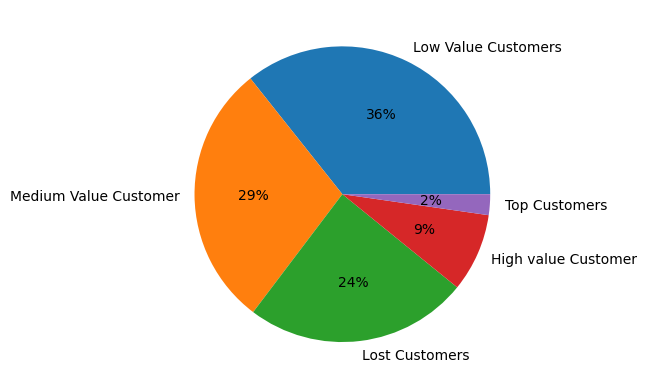

In [31]:
import matplotlib.pyplot as plt
plt.pie(rfm_table.Customer_segment.value_counts(),
        labels=rfm_table.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()